# 빅데이터언어 3차과제
* 학번: 2017203053
* 학과: 소프트웨어학부
* 이름: 김형석
## 1번 Sample data 3개 만들어서 예측

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

# Read csv file
df=pd.read_csv("bodyfat.csv")

# 선형 회귀 분석에 사용할 Features 선택
Rformula='BodyFat ~ Abdomen + Age + Ankle + Biceps + Chest + Density + \
          Forearm + Height + Hip + Knee + Neck + Thigh + Weight + Wrist'

# 선형 회귀 모델에 fit, 수업시간에 소개된 statsmodels 라이브러리의 ols 모델을 사용했습니다.
regression_result=ols(Rformula, data=df).fit()

# Sample Data, 결과가 맞는지 보기 편하도록 과제 ppt와 동일한 값으로 생성했습니다.
sampledata=pd.DataFrame({"Abdomen": [85.2, 95.0, 98.0],
                         "Age": [23, 35, 46],
                         "Ankle": [22.5, 21.5, 23.4],
                         "Biceps": [31, 32, 35],
                         "Chest": [95.0, 95.5, 91.0],
                         "Density": [1.005, 1.034, 1.027],
                         "Forearm": [28.0, 26.9, 25.0],
                         "Height": [65.0, 75.9, 61.0],
                         "Hip": [98, 102, 94],
                         "Knee": [41.0, 37.5, 40.0],
                         "Neck": [34.5, 36.0, 32.0],
                         "Thigh": [65, 58, 53],
                         "Weight": [152, 191, 184],
                         "Wrist": [18.7, 17.0, 16.0]})

# Sample Data를 사용해서 학습된 LinearRegression 모델에 Test
result=regression_result.predict(sampledata)

# Test 결과를 사용해서 DataFrame으로 변환
result=pd.DataFrame(result, columns=["BodyFat"])
# 최종 결과
result

,BodyFat
0,39.211668
1,28.085677
2,30.719582


## 2번 성별에 따른 BodyFat 히스토그램 그리기

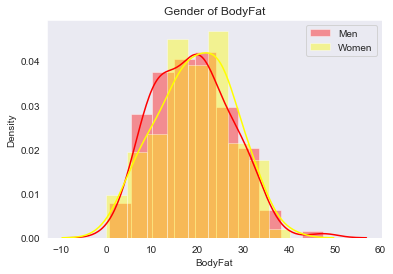

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv file
df=pd.read_csv("bodyfat.csv")

# 배경색 설정
sns.set_style('dark')

# 남자, 여자 BodyFat 데이터 추출
men=df.loc[df['Gender']=='M', 'BodyFat']
women=df.loc[df['Gender']=='W', 'BodyFat']

# 막대 그래프와 커널 밀도 추정 그래프 그리기
sns.distplot(men, kde=True, color='red', label='Men')
sns.distplot(women, kde=True, color='yellow', label='Women')
plt.title("Gender of BodyFat")
plt.legend()
plt.show()

## 3번 Density 부분 회귀 플롯 출력

eval_env: 1


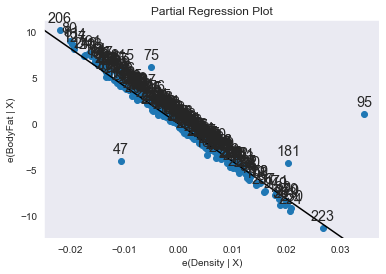

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv file
df=pd.read_csv("bodyfat.csv")

# 배경색 설정
sns.set_style('dark')
# BodyFat, Densiry를 제외한 나머지 Features
others = list(set(df.columns).difference(set(['BodyFat','Density'])))
# 부분 회귀 플로팅
p, resids = sm.graphics.plot_partregress('BodyFat', 'Density', others, data=df, ret_coords=True)
plt.show()